# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


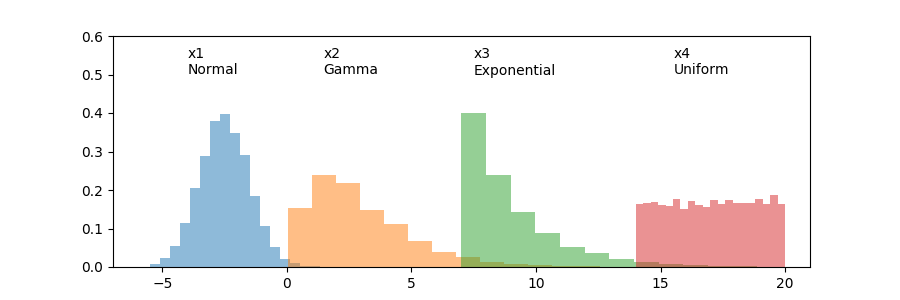

10000


<IPython.core.display.Javascript object>


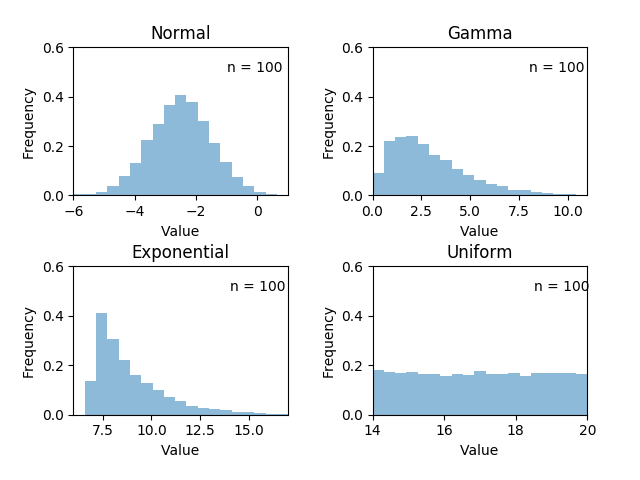

In [65]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5)
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

# create 2x2 grid of axis subplots
#fig, ((x1, x2), (x3, x4)) = plt.subplots(2, 2)
#axs = [x1,x2,x3,x4]
# draw n = 10, 100, 1000, and 10000 samples from the normal distribution an
#for n in range(0,len(axs)):
   # sample_size = 10**(n+1)
    #sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    #axs[n].hist(sample)
    #axs[n].set_title('n={}'.format(sample_size))
    
    
import matplotlib.animation as animation
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)
axs = [x1,x2,x3,x4]
#x1 = x1[100:]
print(len(x1))
bins1 = np.linspace(-6,1, num=20)
bins2 = np.linspace(0,11, num=20)
bins3 = np.linspace(6,17, num=20)
bins4 = np.linspace(14,20, num=20)
bins = [bins1,bins2,bins3,bins4]
x_limits = [[-6,1],[0,11],[6,17],[14,20]]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.tight_layout(pad=3.0)
axes = [ax1,ax2,ax3,ax4]
titles = ['Normal', 'Gamma', 'Exponential', 'Uniform']
annotations = [[-1,0.5],[8,0.5],[14,0.5],[18.5,0.5]]
def update(curr):
    # check if animation is at the last frame, and if so, stop the animatio
    n=100
    if curr == n:
        a.event_source.stop()
    for i in range(0,len(axs)):
        #axes[i].hist(x1[:curr], normed=True, bins=np.linspace(-6,1, num=21), alpha=0.5)
        axes[i].cla()
        axes[i].hist(axs[i][:100*curr], normed=True, bins=bins[i], alpha=0.5)
        #axes[i].axis(limits[i])
        axes[i].set_title('{}'.format(titles[i]))
        axes[i].set_ylabel('Frequency')
        axes[i].set_xlabel('Value')
        axes[i].set_xlim(x_limits[i])
        axes[i].set_ylim([0,0.6])
        axes[i].annotate('n = {}'.format(curr), annotations[i])
a = animation.FuncAnimation(fig, update, interval=50)
    